# 4. 数据获取

标签（空格分隔）： history_bars

## 数据获取代码

上证股票： .XSHG

深证股票： .XSHE

当前可交易股指期货： get_future_contracts("IF")[0]

sh_stock: [(20170405000000,  19.22,  19.29,  19.01,  19.07,  48602592.)]
19.07
sz_stock: [(20170405000000,  9.16,  9.22,  9.15,  9.21,  49915009.)]
future: [(20170405000000,  3485.,  3511.2,  3471.8,  3507.2,  16966.)]


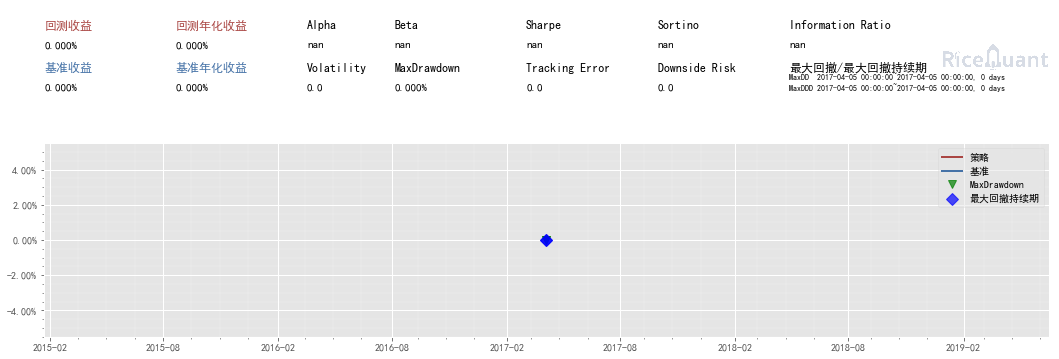

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2017-04-05  2782.7     1997217.3                    1.0    2000000.0   
  
              unit_net_value      units  
  date                                   
  2017-04-05             1.0  2000000.0  ,
  'future_account':                  cash  daily_pnl  holding_pnl  margin  market_value  \
  date                                                                  
  2017-04-05  1000000.0          0            0       0             0   
  
              realized_pnl  total_value  transaction_cost  
  date                                                     
  2017-04-05             0    1000000.0                 0  ,
  'future_positions': Empty DataFrame
  Columns: []
  Index: [],
  'portfolio':                  cash  market_value  static_unit_net_value  total_value  \
  date                           

In [4]:
import rqalpha
from rqalpha.api import *

def init(context):
    context.sh_stock = '600036.XSHG'
    context.sz_stock = '000001.XSHE'
    context.future = get_future_contracts("IF")[0]

# bar_dirt可读取bar信息
def handle_bar(context, bar_dict):
    # history_bars用来读取历史数据
    sh_stock = history_bars(context.sh_stock, 1, '1d')
    print ('sh_stock:', sh_stock)
    print (bar_dict[context.sh_stock].last)
    sz_stock = history_bars(context.sz_stock, 1, '1d')
    print ('sz_stock:', sz_stock)
    future = history_bars(context.future, 1, '1d')
    print ('future:', future)

config = {
  "base": {
    "start_date": "2017-04-03",
    "end_date": "2017-04-05",
    "accounts": {'stock':1000000, 'future':1000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)